In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading cleaned dataset

In [ ]:
new_df = pickle.load(open('new_df.pkl' ,'rb'))
new_df.shape

(274281, 9)

In [ ]:
new_df.head()

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,AmountSpent,frequency,monthName,DayName
0,17850.0,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,271,December,Wednesday
1,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday
2,17850.0,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,271,December,Wednesday
3,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday
4,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday


# Feature scaling

In [ ]:
scaler = StandardScaler()

new_df_scaled = scaler.fit_transform(new_df[['AmountSpent' ,'frequency']])
new_df_scaled

array([[ 0.49268455,  0.42887023],
       [ 1.10928057,  0.42887023],
       [ 1.31236577,  0.42887023],
       ...,
       [-0.13125191, -0.94364267],
       [ 1.6744936 , -0.94364267],
       [ 0.63949313, -0.94364267]])

In [ ]:
new_df_scaled.shape

(274281, 2)

# Model Building

### find best value for n_cluster

In [ ]:
wcss = []

for i in range(1,11):
  kmc = KMeans(n_clusters=i)
  kmc.fit(new_df_scaled)

  wcss.append(kmc.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
for i in wcss:
  print(i , " " , end = "")

548561.9999999932  337102.08331447083  189952.6668242069  150667.61225919073  120618.97924197219  95476.66526328669  82459.850731017  71606.37319919535  62927.18620904065  57257.619495956875  

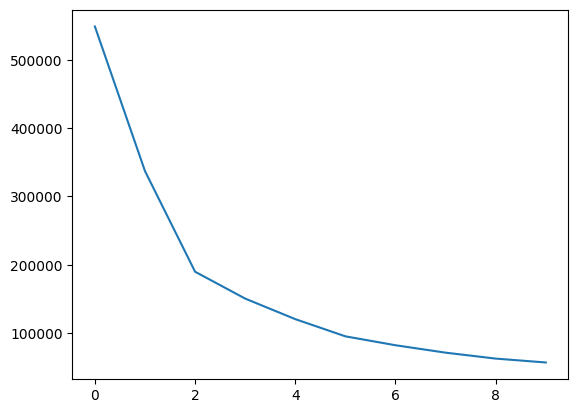

In [ ]:
plt.plot(wcss)

#Taking n_cluster is 2

In [ ]:
kmc = KMeans(n_clusters = 5)
new_df['Cluster'] = kmc.fit_predict(new_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
temp = pd.DataFrame(np.hstack((new_df[['AmountSpent' ,'frequency']].values , y_means.reshape(-1,1))) , columns = ['AmountSpent' , 'frequency' ,'Cluster'])
temp

,AmountSpent,frequency,Cluster
0,15.30,271.0,1.0
1,20.34,271.0,1.0
2,22.00,271.0,1.0
3,20.34,271.0,1.0
4,20.34,271.0,1.0
...,...,...,...
274276,15.00,36.0,1.0
274277,10.20,36.0,1.0
274278,10.20,36.0,1.0
274279,24.96,36.0,1.0


### before

<Axes: xlabel='AmountSpent', ylabel='frequency'>

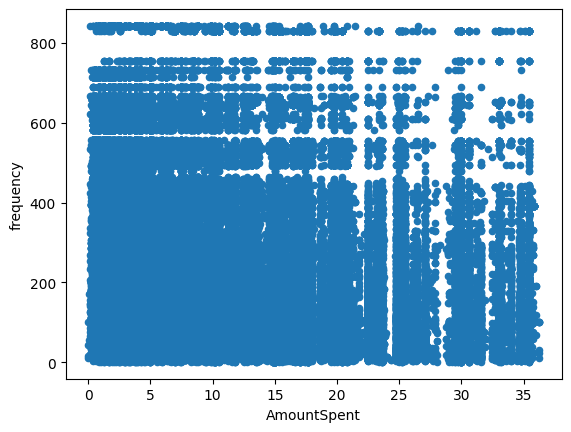

In [ ]:
new_df[['AmountSpent' ,'frequency']].plot(kind = 'scatter' , x = 'AmountSpent' , y = 'frequency')

### after cluster making

<Axes: xlabel='AmountSpent', ylabel='frequency'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


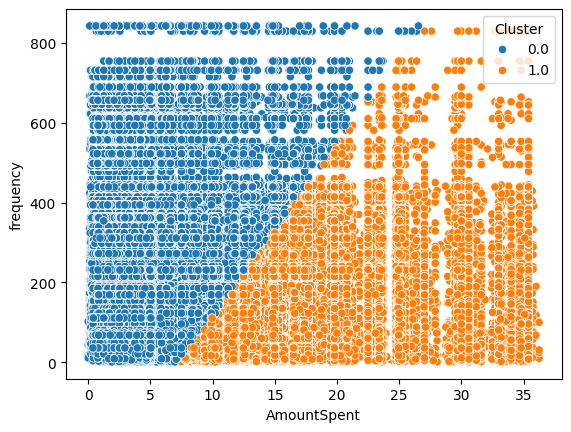

In [ ]:
sns.scatterplot(data = temp , x= 'AmountSpent' , y = 'frequency', hue = 'Cluster')

**0.0 represent high frequency and**   
**1.0 represents high amount purchases**

In [ ]:
new_df.head()

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,AmountSpent,frequency,monthName,DayName,Cluster
0,17850.0,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,271,December,Wednesday,4
1,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4
2,17850.0,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,271,December,Wednesday,4
3,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4
4,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4


<Axes: xlabel='Cluster', ylabel='AmountSpent'>

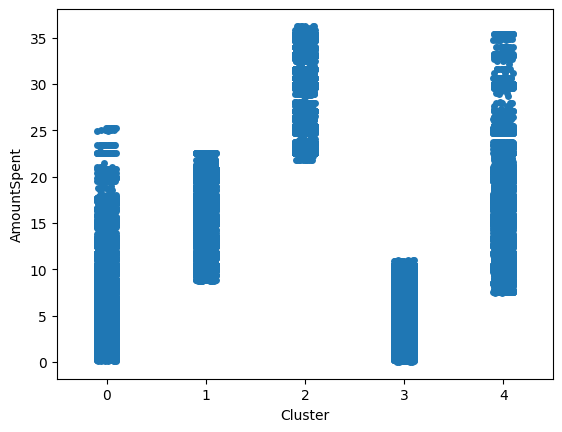

In [ ]:
sns.stripplot(data = new_df , x = 'Cluster' , y = 'AmountSpent' )

<Axes: xlabel='Cluster', ylabel='frequency'>

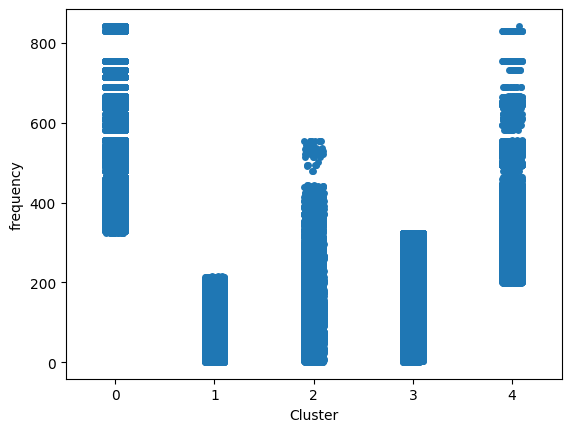

In [ ]:
sns.stripplot(data = new_df , x = 'Cluster' , y = 'frequency' )

In [ ]:
# fixing indexing
new_df.reset_index().drop(columns = ['index'] , inplace = True)

In [ ]:
new_df

,CustomerID,InvoiceDate,Country,Quantity,UnitPrice,AmountSpent,frequency,monthName,DayName,Cluster
0,17850.0,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,271,December,Wednesday,4
1,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4
2,17850.0,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,271,December,Wednesday,4
3,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4
4,17850.0,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,271,December,Wednesday,4
...,...,...,...,...,...,...,...,...,...,...
324160,12713.0,2011-12-09 12:16:00,Germany,12,1.25,15.00,36,December,Friday,1
324161,12713.0,2011-12-09 12:16:00,Germany,12,0.85,10.20,36,December,Friday,1
324162,12713.0,2011-12-09 12:16:00,Germany,12,0.85,10.20,36,December,Friday,1
324163,12713.0,2011-12-09 12:16:00,Germany,12,2.08,24.96,36,December,Friday,2


In [ ]:
pickle.dump(new_df , open('final_df.pkl', 'wb'))